# Assignment #1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from urllib.request import urlopen
from bs4 import BeautifulSoup

%matplotlib inline

## Web Data Gathering using Beautiful Soup

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [2]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

# 'lxml' is the html parser
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [3]:
# get the title of the page
display(soup.title)
# get the text of the webpage
soup.text;

<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>

### Extract useful html tags
* < a > for hyperlinks
* < table > for tables
* < tr > for table rows
* < th > for table headers
* < td > for table

In [4]:
link_tags = soup.find_all('a')

print("\nAll hyperlink tags:\n")
list(map(print, link_tags))

print_links = lambda link_tag: print(link_tag.get("href"))  

print("\nAll links:\n")
list(map(print_links, link_tags));


All hyperlink tags:

<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>
<a href="https://www.hubertiming.com/">Huber Timing Home</a>
<a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K Individual</a>
<a class="btn btn-primary btn-lg" href="/results/team/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 5K Team</a>
<a class="btn btn-primary btn-lg" href="/results/team/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 10K Team</a>
<a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>
<a id="individual" name="individual"></a>
<a data-url="/results/2017GPTR10K" href="#tabs-1" id="rootTab" style="font-size: 18px">10K Results</a>
<a href="https://www.hubertiming.com/

In [5]:
# print first 10 table rows
rows = soup.find_all('tr')
print("Num of rows found = {}\n".format(len(rows)))
print("First 10 rows: \n\n", rows[:10])

Num of rows found = 582

First 10 rows: 

 [<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>577</td>
</tr>, <tr>
<td>Male:</td>
<td>414</td>
</tr>, <tr>
<td>Female:</td>
<td>163</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>5:51</td>
<td>36:24</td>
<td></td>
</tr>, <tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>5:55</td>
<td>36:45</td>
<td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>
</tr>, <t

In [6]:
# get table cells in a row

for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td>577</td>, <td>443</td>, <td>

                    LIBBY B MITCHELL

                </td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:41:18</td>, <td>16:20</td>, <td>1:42:10</td>, <td></td>]


bs4.element.ResultSet

### Extract Text from tags using BeautifulSoup

In [7]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 16:20, 1:42:10, ]


### Extract Text from tags using regex

The `<.*?>` regex will match an opening angle bracket followed by anything and followed by a closing angle bracket. The `?` character causes the regex to match text in a non-greedy fashion, that is, it matches the shortest possible string. If you omit the question mark, it will match all the text between the first opening angle bracket and the last closing angle bracket which would lead to confusing results.


In [8]:
import re

clean_regex_1 = re.compile('<.*?>')
clean_regex_2 = re.compile(',\s+')
clean_regex_3 = re.compile('\s+,')

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean2 = (re.sub(clean_regex_1, '',str_cells))
    clean3 = (re.sub(clean_regex_2, ',',clean2))
    clean4 = (re.sub(clean_regex_3, ',',clean3))
    list_rows.append(clean4)

print(clean4)
print(type(clean4))

[577,443,LIBBY B MITCHELL,F,HILLSBORO,OR,1:41:18,16:20,1:42:10,]
<class 'str'>


### Load rows into pandas dataframe

In [9]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:,577]"
2,"[Male:,414]"
3,"[Female:,163]"
4,[]
5,"[1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:..."
6,"[2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,..."
7,"[3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05..."
8,"[4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,3..."
9,"[5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:..."


## Data Transformation

The dataframe is not in the format we want. To clean it up, split the "0" column into multiple columns at the comma position.

In [10]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9
0,[],None,None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None,None
5,[1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
6,[2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F\r\n ]
7,[3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,]
8,[4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,[5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F\r\n ]


Use the strip() method to remove the opening square bracket on column "0."

In [11]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9
0,],None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F\r\n ]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F\r\n ]


Find all table headers

In [12]:
col_labels = soup.find_all('th')

all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print("All table headers:\n", all_header)

# Convert the table headers to a new pandas dataframe

df2 = pd.DataFrame(all_header)
display(df2.head())

# split column "0" into multiple columns at the comma position for all rows.

df3 = df2[0].str.split(',', expand=True)
display(df3.head())

All table headers:
 ['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gun Time, Team]']


,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


,0,1,2,3,4,5,6,7,8,9
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]


### Concatenate and re-format table to properly represent rows

In [13]:
# concatenate the two dataframes into one using the concat() method

frames = [df3, df1]

df4 = pd.concat(frames)
display(df4.head(10))

# re-configure the data fram so that the first row is the table header.

df5 = df4.rename(columns=df4.iloc[0])
display(df5.head())

,0,1,2,3,4,5,6,7,8,9
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F\r\n ]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]


,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None


### Get an overview of Data

In [14]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 581
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   [Place      583 non-null    object
 1    Bib        581 non-null    object
 2    Name       578 non-null    object
 3    Gender     578 non-null    object
 4    City       578 non-null    object
 5    State      578 non-null    object
 6    Chip Time  578 non-null    object
 7    Chip Pace  578 non-null    object
 8    Gun Time   578 non-null    object
 9    Team]      578 non-null    object
dtypes: object(10)
memory usage: 50.1+ KB


(583, 10)

### Validate Data

Drop all rows with any missing values. __In a real data engineering project probably we would validate the data thoroughly by devising predicates for every aspect of the data.__

In [15]:
df6 = df5.dropna(axis=0, how='any')
df6.info()
df6.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 0 to 581
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   [Place      578 non-null    object
 1    Bib        578 non-null    object
 2    Name       578 non-null    object
 3    Gender     578 non-null    object
 4    City       578 non-null    object
 5    State      578 non-null    object
 6    Chip Time  578 non-null    object
 7    Chip Pace  578 non-null    object
 8    Gun Time   578 non-null    object
 9    Team]      578 non-null    object
dtypes: object(10)
memory usage: 49.7+ KB


(578, 10)

### More Re-formatting

In [16]:
# table header is replicated as the first row in df5 and df6
display(df6.head())

# drop first row
df7 = df6.drop(df6.index[0])
display(df7.head())

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F\r\n ]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]


,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F\r\n ]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F\r\n ]


In [17]:
# Clean up the headers a bit more by renaming the '[Place' and ' Team]' columns
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
display(df7.head())

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F\r\n ]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F\r\n ]


In [18]:
# removing the closing bracket for cells in the "Team" column.
df7['Team'] = df7['Team'].str.strip(']')
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F\r\n
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F\r\n


## Data Analysis and Visualization

__What was the average finish time (in minutes) for the runners?__ 

The “Chip Time” field gives the finish time in hh:mm:ss , so you need to transform that column into just minutes. One way to do this is to convert the column to a list first for manipulation.

In [30]:
time_list = df7[' Chip Time'].tolist()

time_mins = []
for i in time_list:
    splits = i.split(':')
    if len(splits) == 2:
        m, s = splits
        math =  (int(m) * 60 + int(s))/60
    elif len(splits) == 3:
        h, m, s = splits
        math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    else:
        raise Exception("Found a time stamp with {} number of splits - {}".format(len(splits), splits))
    time_mins.append(math)
# print(time_mins)

Next, convert the list back into a dataframe and create a new column ("Runner_mins") for runner chip times expressed in just minutes. 

In [31]:
df7['Runner_mins'] = time_mins
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team,Runner_mins
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,,36.350000
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F\r\n,36.700000
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,,37.733333
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,,38.566667
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F\r\n,39.350000


Pandas provides a handy “describe” method that computes a generous list of explanatory statistics for the dataframe.

In [32]:
df7.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


The average chip time for all runners was ~60 mins. The fastest 10K runner finished in 36.35 mins, and the slowest runner finished in 101.30 minutes.

### Box Plots

Boxplots can help to visualize summary statistics (maximum, minimum, medium, first quartile, third quartile, including outliers) for a given column. Below are data summary statistics for the runners shown in a boxplot. For data visualization, it is convenient to first import parameters from the pylab module that comes with matplotlib and set the same size for all figures to avoid doing it for each figure.


([<matplotlib.axis.XTick at 0x1fc002862b0>], [Text(1, 0, 'Runners')])

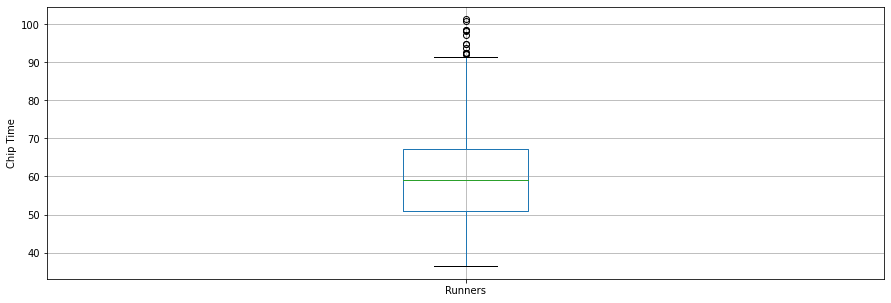

In [33]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
 
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])


The boxplot visualization clearly shows that most runners finished between low 50s and upper 60s (minutes) with a few outliers far up above 90 minutes.

### Normal Distribution

Our second question: __Did the runners' finish times follow a normal distribution?__

To study the shape of the distribution, plot the runners’ chip times using the seaborn python plotting library. 

One thing to note here is the large number of outliers on the high end of the race times. If we ignored those, then the normal distribution might be an even better model of the data. But if we include those outliers, then we might favor a more sophisticated distribution to model the data properly.


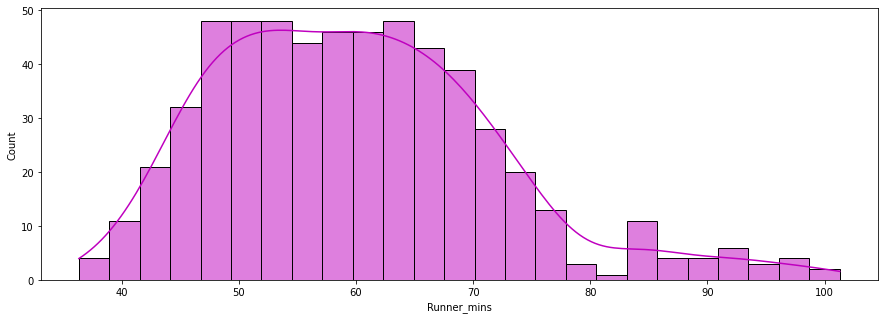

In [59]:
x = df7['Runner_mins']
ax = sns.histplot(x, kde=True, color='m', bins=25)
plt.show()

Question 3: __Were there any performance differences between males and females of various age groups?__ To explore this question plot separate distributions of chip times for males and females.

c:\users\r631915\.virtualenvs\in-class-assignments-3nvfurcr\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\r631915\.virtualenvs\in-class-assignments-3nvfurcr\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


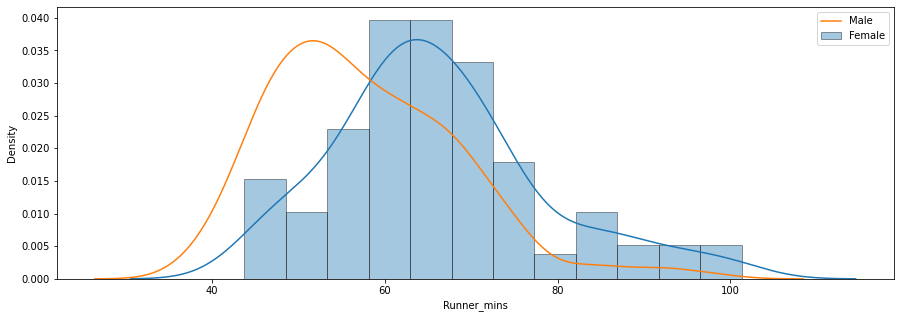

In [85]:
f_fuko = df7.loc[df7[' Gender']=='F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']=='M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

The distribution indicates that females were slower than males on average. If you prefer summary, descriptive statistics to the visual plot, then use the pandas groupby() method to compute summary statistics for males and females separately.

In [86]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)


        Runner_mins                                                         \
              count       mean        std        min        25%        50%   
 Gender                                                                      
F             163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
M             414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
F        72.058333  101.300000  
M        64.804167   98.516667  


The average chip time for all females and males was ~66 mins and ~58 mins, respectively. Next, display a side-by-side boxplot comparison of male and female finish times.

Text(0.5, 0.98, '')

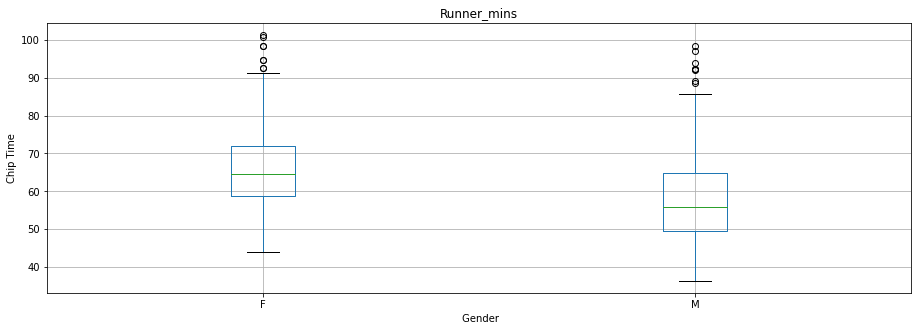

In [87]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")

Looks like both males and females had significant numbers of outliers in the > 90m range.


## Conclusions

Data gathering, transformation, validation, enhancement and analysis were explored during this assignment. 